https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
import os 
import subprocess as ss

In [3]:
os.listdir()

['project_venv',
 'LSTM.ipynb',
 'DFS.csv',
 'README.md',
 '.ipynb_checkpoints',
 '.git']

In [4]:
df=pd.read_csv("DFS.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (3416, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-06-14,28.000000,30.500000,28.000000,28.750000,22.875103,3279100
1,2007-06-15,29.500000,29.799999,28.879999,29.080000,23.137667,790100
2,2007-06-18,29.320000,30.200001,29.299999,29.930000,23.813976,1591000
3,2007-06-19,30.000000,30.299999,29.600000,29.700001,23.630968,1585100
4,2007-06-20,30.040001,30.100000,29.570000,29.809999,23.718491,855900


In [30]:
train_len = int(len(df) * 0.8)
training_set = df.iloc[:train_len, 4:5].values
test_set = df.iloc[train_len:, 4:5].values

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, train_len):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
test_set_scaled = sc.transform(test_set)
X_test = []
y_test = []
for i in range(60, len(test_set)):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, ((X_test.shape)[0], (X_test.shape)[1], 1))
print(X_test.shape)

(624, 60, 1)


In [11]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
84/84 [==============================] - 12s 80ms/step - loss: 0.0511
Epoch 2/100
84/84 [==============================] - 8s 92ms/step - loss: 0.0036
Epoch 3/100
84/84 [==============================] - 7s 79ms/step - loss: 0.0030
Epoch 4/100
84/84 [==============================] - 7s 78ms/step - loss: 0.0030
Epoch 5/100
84/84 [==============================] - 7s 79ms/step - loss: 0.0029
Epoch 6/100
84/84 [==============================] - 7s 79ms/step - loss: 0.0029
Epoch 7/100
84/84 [==============================] - 7s 79ms/step - loss: 0.0027
Epoch 8/100
84/84 [==============================] - 7s 78ms/step - loss: 0.0023
Epoch 9/100
84/84 [==============================] - 7s 78ms/step - loss: 0.0025
Epoch 10/100
84/84 [==============================] - 7s 78ms/step - loss: 0.0022
Epoch 11/100
84/84 [==============================] - 7s 79ms/step - loss: 0.0021
Epoch 12/100
84/84 [==============================] - 7s 84ms/step - loss: 0.0023
Epoch 13/100
84/84 [====

84/84 [==============================] - 5s 64ms/step - loss: 8.1361e-04
Epoch 100/100
84/84 [==============================] - 5s 65ms/step - loss: 9.4109e-04


In [47]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [48]:
X_test.shape

(624, 60, 1)

In [49]:
len(predicted_stock_price)

624

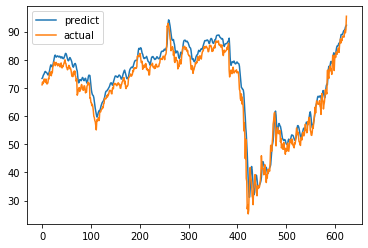

In [52]:
plt.plot(predicted_stock_price, label='predict')
plt.plot(y_test, label='actual')
plt.legend()

In [55]:
SE = 0
for i in range(len(predicted_stock_price)):
    SE += (predicted_stock_price[i] - y_test[i])**2

In [58]:
(SE/len(predicted_stock_price))**0.5

array([3.6118064], dtype=float32)

In [ ]:
predicted_stock_price[i] - y_test[i]